In [54]:
import pandas as pd
import matplotlib.pyplot as plt


city = 'MARIBOR'

train = pd.read_csv(f'../data/train/{city}.csv', parse_dates=True, index_col=0)

train = train.sort_index()

In [55]:
# add column to calculate time difference between two consecutive rows
train['time_diff'] = train.index.to_series().diff().dt.total_seconds().fillna(0)

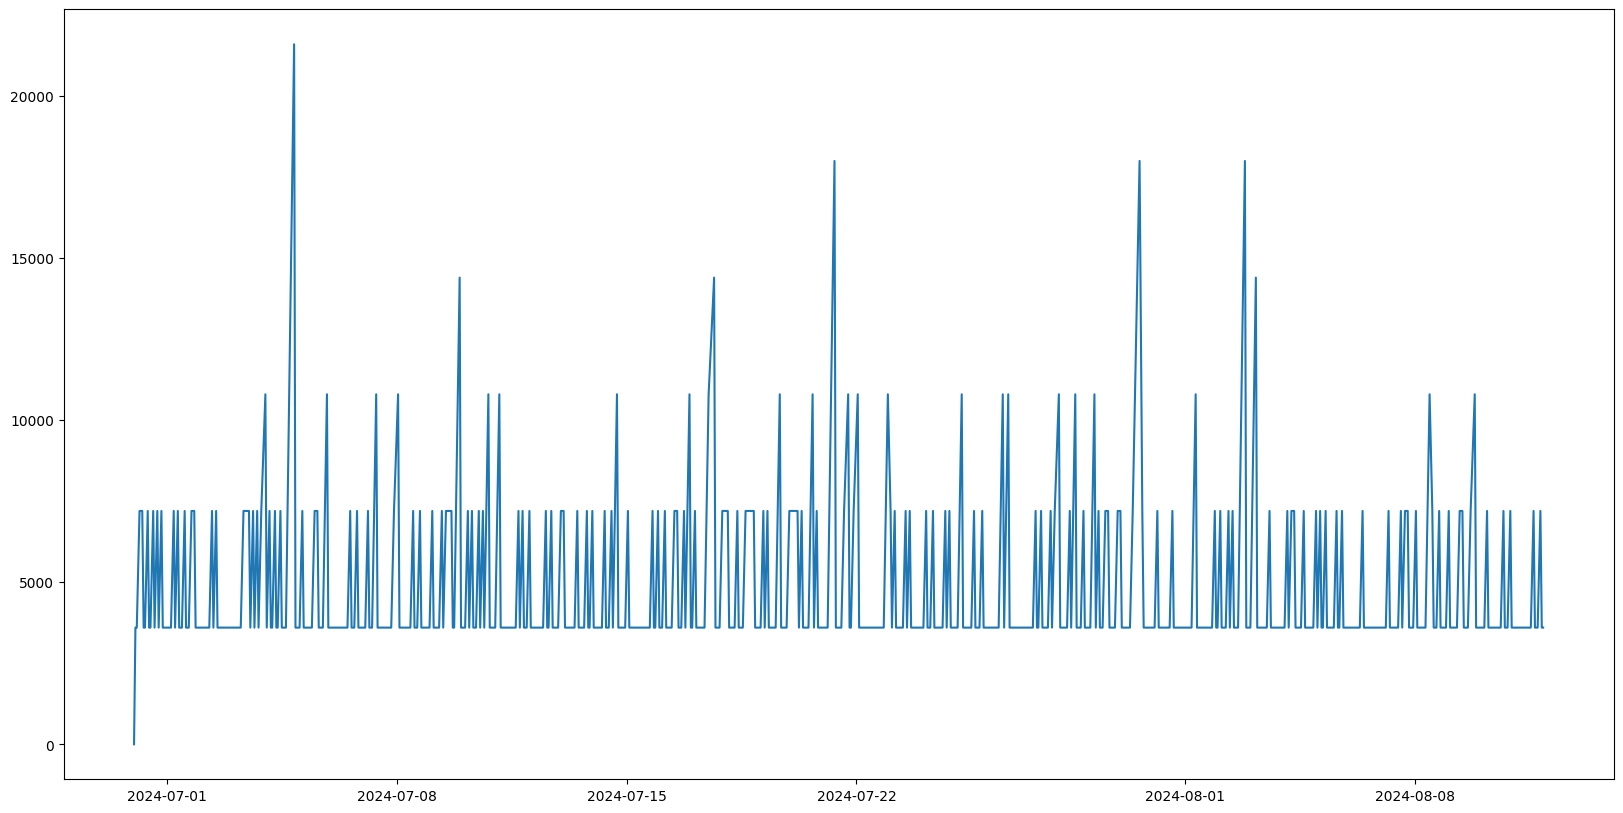

In [56]:
# plot time diffeence based on time using plt, make graph larger
plt.figure(figsize=(20, 10))
plt.plot(train.index, train['time_diff'])
plt.show()

In [57]:
train['time_diff'].describe()

count      825.000000
mean      4494.545455
std       2083.728412
min          0.000000
25%       3600.000000
50%       3600.000000
75%       3600.000000
max      21600.000000
Name: time_diff, dtype: float64

In [58]:
train_resampled = train.resample('H').mean()
train_resampled.fillna(method='ffill', inplace=True)

C:\Users\Tine Šuster\AppData\Local\Temp\ipykernel_24748\1888601644.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  train_resampled = train.resample('H').mean()
C:\Users\Tine Šuster\AppData\Local\Temp\ipykernel_24748\1888601644.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_resampled.fillna(method='ffill', inplace=True)


In [59]:
train_resampled['time_diff'] = train_resampled.index.to_series().diff().dt.total_seconds().fillna(0)

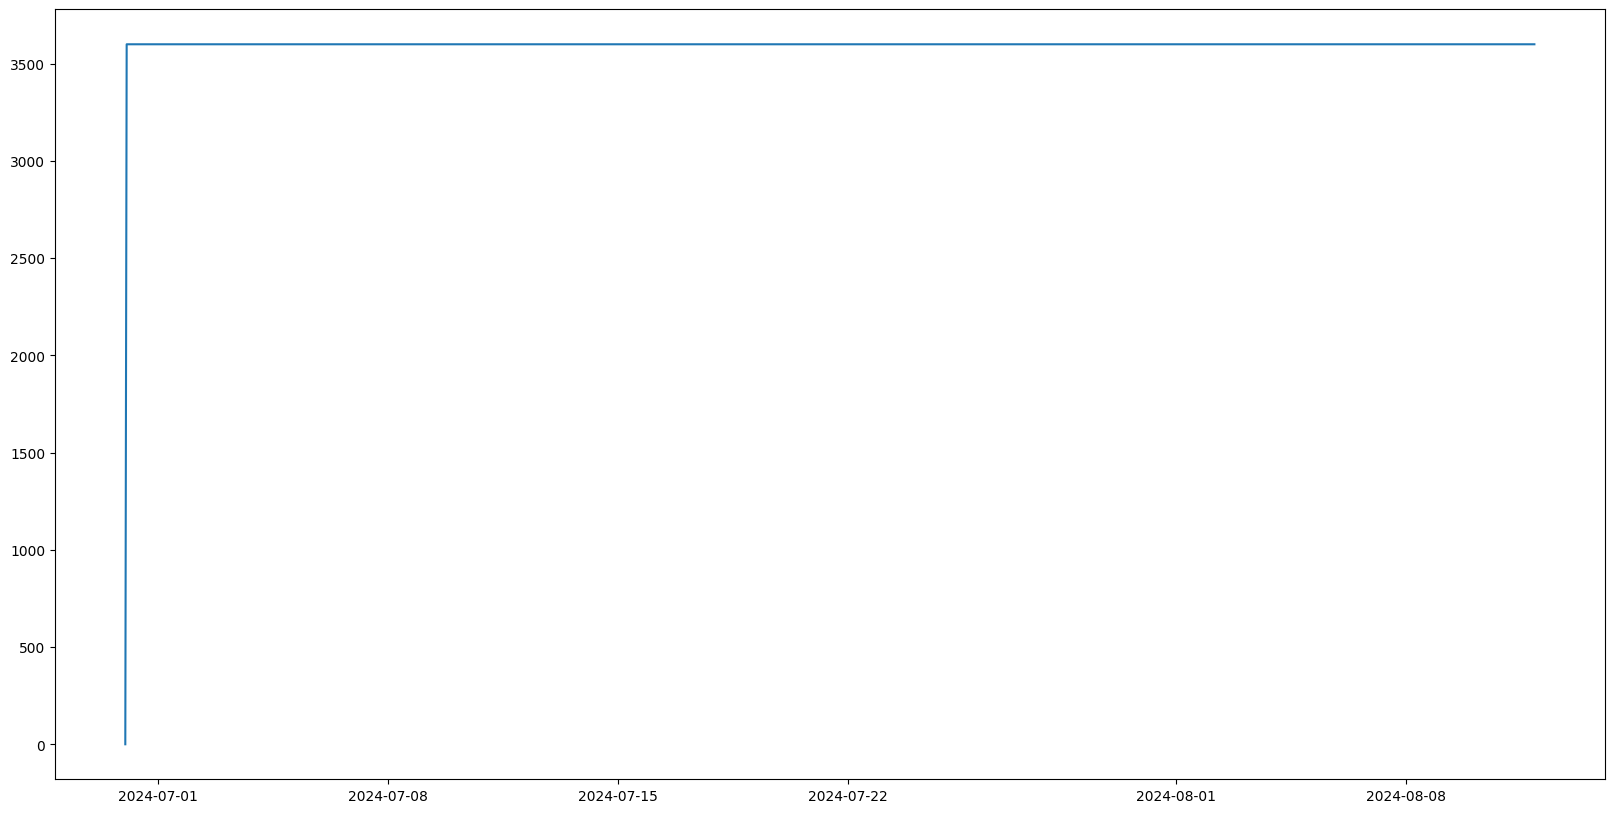

In [60]:
plt.figure(figsize=(20, 10))
plt.plot(train_resampled.index, train_resampled['time_diff'])
plt.show()

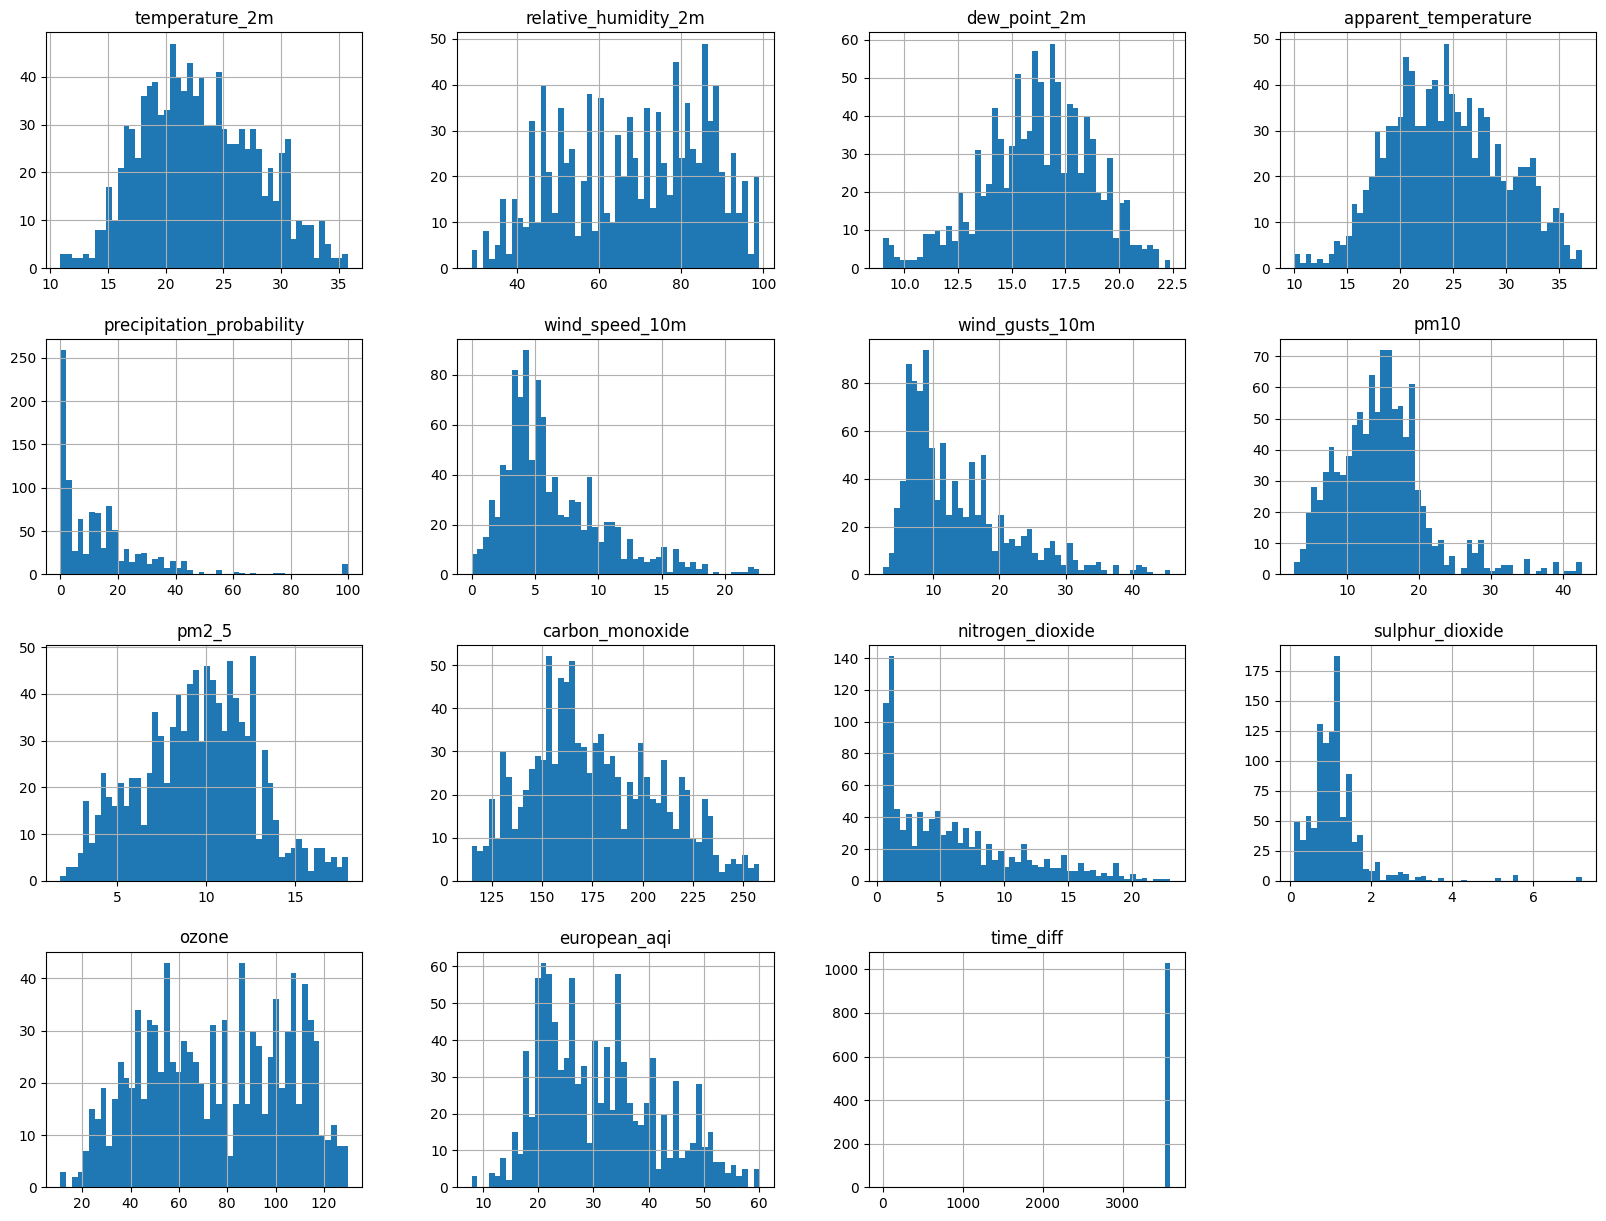

In [67]:
# Print distribution of each column in a grid of histograms with 3 rows
train_resampled.hist(bins=50, figsize=(20, 15))
plt.show()


In [62]:
train_resampled['time_diff'].describe()

count    1031.000000
mean     3596.508244
std       112.117439
min         0.000000
25%      3600.000000
50%      3600.000000
75%      3600.000000
max      3600.000000
Name: time_diff, dtype: float64